## Keşifçi Veri Analizi | Becerileri Pekiştirme

Aşağıda ihtiyacımız doğrultusunda kullanacağımız kütüphaneleri yükleyelim.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

Veri çerçevemizi bulunduğumuz dizinden yükleyelim ve bir veri çerçevesi haline getirerek df değişkenine atayalım. (pd.read_csv(...csv))

In [2]:
df = pd.read_csv('../input/iris-flower-dataset/IRIS.csv')

Veri çerçevesinin ilk 5 gözlemini görüntüleyelim.

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Veri çerçevesinin kaç öznitelik ve kaç gözlemden oluştuğunu görüntüleyelim.

In [4]:
df.shape

(150, 5)

Veri çerçevesindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

Standart sapma ve ortalama değerlerden çıkarımda bulunarak hangi değişkenlerin ne kadar varyansa sahip olduğu hakkında fikir yürütelim.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


Veri çerçevesinde hangi öznitelikte kaç adet eksik değer olduğunu gözlemleyelim.

→ Standart sapma ortalamadan olan asapmanın genel ölçüsüdür. Standart sapma ne kadar küçükse veriler ortalamaya yakın yerlerde dağılmışlardır, standart sapma  ne kadar büyükse veriler ortalamadan uzak yerlerde dağılmışlardır. 
→ Varyans standart sapmanın karesidir, dağılımın ne kadar değişkenlik içerdiğini gösterir.

→Standart sapmaları incelediğimizde standart sapması en küçük olan değişken sepal_width değişkenidir verileri en düzgün dağılan değişkendir. Sırasıyla petal_width,sepal_length ve petal_length gelmektedir.

In [7]:
df.isnull().values.any()

False

In [8]:
df.isna().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Sayısal değişkenler arasında korelasyon olup olmadığını göstermek için korelasyon matrisi çizdirelim. Korelasyon katsayıları hakkında fikir yürütelim.

En güçlü pozitif ilişki hangi iki değişken arasındadır?

In [9]:
corr = df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


→ Korelasyon (ilişki), iki değişkenin birlikte değişiminin bir ölçüsüdür. Korelasyon katsayısı -1 ve 1 arasında değer alır. Korelasyonun büyüklüğü (0-1) iki değişken arasındaki ilişkinin gücünü gösterirken işareti (+,-) değişkenlerin aynı yönde (+) artıp azaldığını ya da zıt yönlerde (-) artış ve azalış gösterdiğini belirtir. Değişkenler birlikte artıyor veya azalıyorsa pozitif yönde, değişkenlerden biri artarken diğeri azalıyorsa ise negatif yönde bir ilişki vardır.

→Korelasyon matrisine baktığımızda en güçlü pozitif ilişki, 0.962865 değerini gösteren petal_length ve petal_width arasındadır.

Korelasyon katsayılarını daha iyi okuyabilmek için ısı haritası çizdirelim.

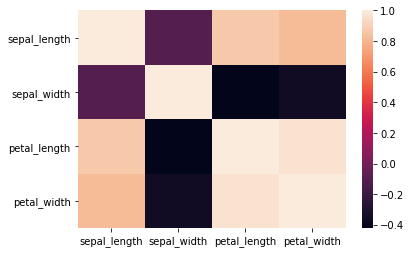

In [10]:
corr = df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values);

Veri çerçevemizin hedef değişkeninin "variety" benzersiz değerlerini görüntüleyelim.

In [11]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Veri çerçevemizin hedef değişkeninin "variety" benzersiz kaç adet değer içerdiğini görüntüleyelim.

In [12]:
df["species"].nunique()

3

Veri çerçevesindeki sepal.width ve sepal.length değişkenlerinin sürekli olduğunu görüyoruz. Bu iki sürekli veriyi görselleştirmek için önce scatterplot kullanalım.

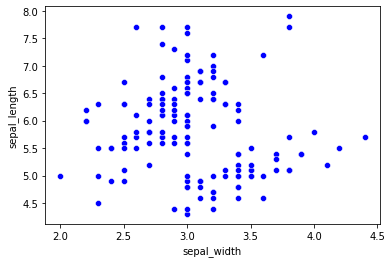

In [13]:
sns.scatterplot(x = "sepal_width", y = "sepal_length", data = df, color="blue");

Aynı iki veriyi daha farklı bir açıdan frekanslarıyla incelemek için jointplot kullanarak görselleştirelim. 

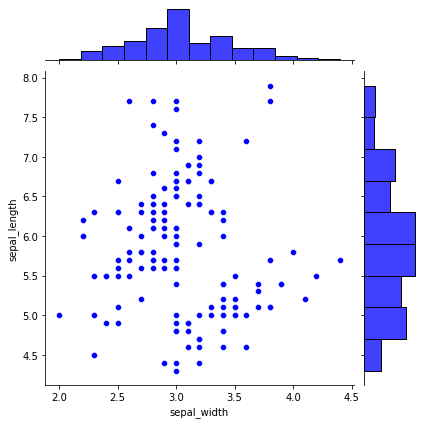

In [14]:
sns.jointplot(x = "sepal_width", y = "sepal_length", data = df, color = "blue");

Aynı iki veriyi scatterplot ile tekrardan görselleştirelim fakat bu sefer "species" parametresi ile hedef değişkenine göre kırdıralım. 

3 farklı renk arasında sepal değişkenleriyle bir kümeleme yapılabilir mi? Ne kadar ayırt edilebilir bunun üzerine düşünelim.

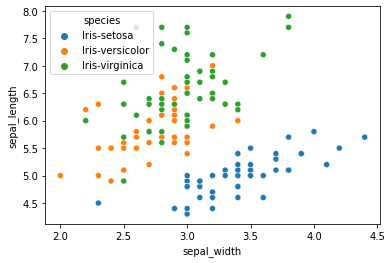

In [15]:
sns.scatterplot(x = "sepal_width", y = "sepal_length", hue = "species", data=df);

→ sepal değişkenleriyle kümeleme yapılabilir ve kümelemeyle türler ayırt edilebilir.

value_counts() fonksiyonu ile veri çerçevemizin ne kadar dengeli dağıldığını sorgulayalım. 

In [16]:
df["species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

→ Her çiçek türünün 50 adet gözlem barındırdığını görüyoruz. Bundan dolayı dengeli bir dağılım olduğunu söyleyebiliriz.

Keman grafiği çizdirerek sepal.width değişkeninin dağılımını inceleyin. 

Söz konusu dağılım bizim için ne ifade ediyor, normal bir dağılım olduğunu söyleyebilir miyiz?

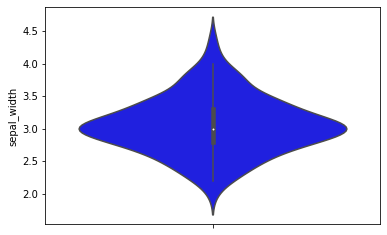

In [17]:
sns.violinplot(y = "sepal_width", data = df, color = "blue");

Daha iyi anlayabilmek için sepal.width üzerine bir distplot çizdirelim.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


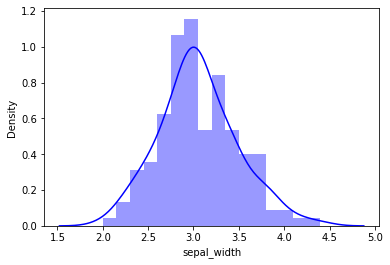

In [18]:
sns.distplot(df["sepal_width"], bins = 16, color = "blue");

Üç çiçek türü için üç farklı keman grafiğini sepal.length değişkeninin dağılımı üzerine tek bir satır ile görselleştirelim.

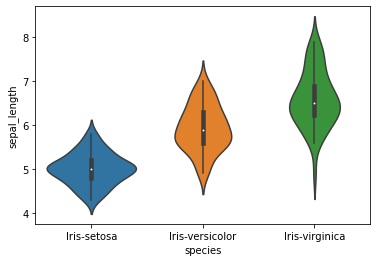

In [19]:
sns.violinplot(x = "species", y = "sepal_length", data = df);

→ Görüldüğü üzere veri çerçevemiz her çiçek türünden 50 adet gözlem barındırıyor.

Hangi çiçek türünden kaçar adet gözlem barındırıyor veri çerçevemiz?

50 x 3 olduğunu ve dengeli olduğunu value_counts ile zaten görmüştük, ancak bunu görsel olarak ifade etmek için sns.countplot() fonksiyonuna species parametresini vereilm.

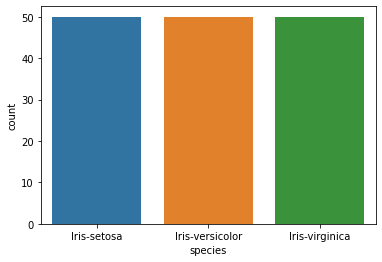

In [20]:
sns.countplot(x = "species", data = df);

sepal.length ve sepal.width değişkenlerini sns.jointplot ile görselleştirelim, dağılımı ve dağılımın frekansı yüksek olduğu bölgelerini inceleyelim.

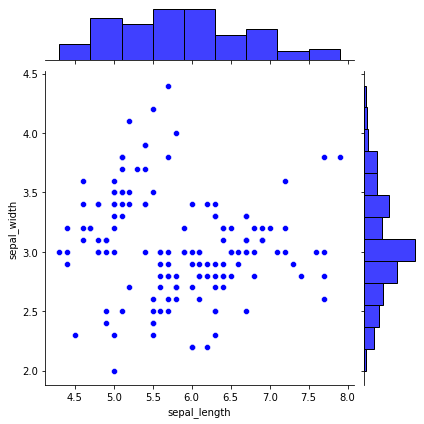

In [21]:
sns.jointplot(x = "sepal_length", y = "sepal_width", data = df, color = "blue");

→ sepal_length için 5.5 ve 6.5 arasında, sepal_width için 2.75 ve 3.25 arasında dağılım frekansının yüksek olduğunu söyleyebiliriz.

Bir önceki hücrede yapmış olduğumuz görselleştirmeye kind = "kde" parametresini ekleyelim. Böylelikle dağılımın noktalı gösterimden çıkıp yoğunluk odaklı bir görselleştirmeye dönüştüğünü görmüş olacağız.

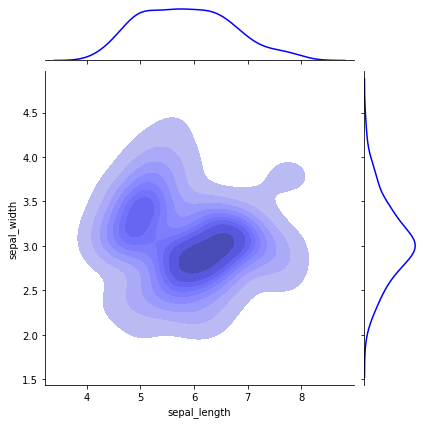

In [22]:
sns.jointplot(x = df["sepal_length"], y = df["sepal_width"],kind ="kde", shade = "True", color = "blue");

scatterplot ile petal.length ve petal.width değişkenlerinin dağılımlarını çizdirelim.

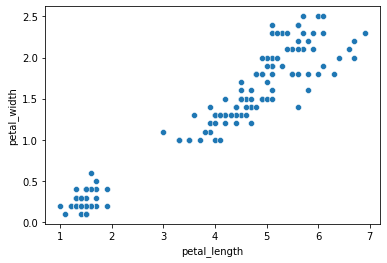

In [23]:
sns.scatterplot(x = "petal_length", y = "petal_width", data = df);

Aynı görselleştirmeye hue = "species" parametresini ekleyerek 3. bir boyut verelim.

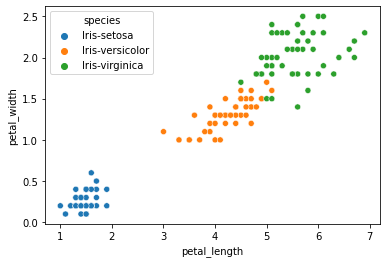

In [24]:
sns.scatterplot(x = "petal_length", y = "petal_width",hue = "species", data = df);

sns.lmplot() görselleştirmesini petal.length ve petal.width değişkenleriyle implemente edelim. Petal length ile petal width arasında ne tür bir ilişki var ve bu ilişki güçlü müdür? sorusunu yanıtlayalım.

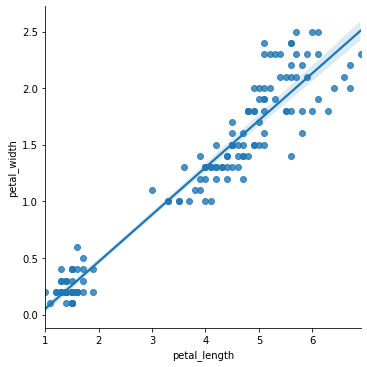

In [25]:
sns.lmplot(x = "petal_length", y = "petal_width", data = df);

→ Değişkenler birlikte artış gösteriyor. petal_length ve petal_width arasında pozitif yönde,güçlü bir ilişki vardır

Bu sorunun yanıtını pekiştirmek için iki değişken arasında korelasyon katsayısını yazdıralım. 

In [26]:
df.corr()["petal_length"]["petal_width"]

0.9627570970509662

Petal Length ile Sepal Length değerlerini toplayarak yeni bir total length özniteliği oluşturalım.

In [27]:
df["total_length"] = df["petal_length"] + df["sepal_length"]

total.length'in ortalama değerini yazdıralım. 

In [28]:
df["total_length"].mean()

9.602000000000004

total.length'in standart sapma değerini yazdıralım.

In [29]:
df["total_length"].std()

2.5191739884121978

sepal.length'in maksimum değerini yazdıralım.

In [30]:
df["sepal_length"].max()

7.9

sepal.length'i 5.5'den büyük ve türü setosa olan gözlemleri yazdıralım.

In [31]:
df[(df["sepal_length"] > 5.5) & (df["species"] == "Setosa")]

,sepal_length,sepal_width,petal_length,petal_width,species,total_length


petal.length'i 5'den küçük ve türü virginica olan gözlemlerin sadece sepal.length ve sepal.width değişkenlerini ve değerlerini yazdıralım.

In [32]:
df[(df["petal_length"] < 5) & (df["species"] == "Virginica")][["sepal_length","sepal_width"]]

,sepal_length,sepal_width


Hedef değişkenimiz species'e göre bir gruplama işlemi yapalım değişken değerlerimizin ortalamasını görüntüleyelim.

In [33]:
df.groupby(["species"]).mean()

,sepal_length,sepal_width,petal_length,petal_width,total_length
species,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,6.470
Iris-versicolor,5.936,2.770,4.260,1.326,10.196
Iris-virginica,6.588,2.974,5.552,2.026,12.140


Hedef değişkenimiz species'e göre gruplama işlemi yaparak sadece petal.length değişkenimizin standart sapma değerlerini yazdıralım. 

In [34]:
df.groupby(["species"])["petal_length"].std()

species
Iris-setosa        0.173511
Iris-versicolor    0.469911
Iris-virginica     0.551895
Name: petal_length, dtype: float64

Emeğiniz, ayırdığınız vakit ve ilginiz için teşekkürler.